# **Assignment 3 Fundamental Data Analysis By Peeranont Dongpakkij 24666594**

# Data Preprocessing

**Reading the dataset**

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('loan_data_training.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
3,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
pd.set_option('display.max_row',500)
pd.set_option('display.max_column', 100)
data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

**Feature Engineering**

In [ ]:
categorical_features_idx = data.columns.get_indexer(data.select_dtypes('object').columns)
categorical_features = data.columns[categorical_features_idx]
categorical_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [ ]:
#Display all the categoricals values
data[categorical_features]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,MONDAY,Business Entity Type 3
2,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity Type 3
3,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,THURSDAY,Self-employed
4,Cash loans,M,Y,Y,Family,Commercial associate,Incomplete higher,Single / not married,With parents,SUNDAY,Industry: type 4
...,...,...,...,...,...,...,...,...,...,...,...
42447,Cash loans,M,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,TUESDAY,XNA
42448,Cash loans,F,N,Y,Unaccompanied,Working,Lower secondary,Married,House / apartment,MONDAY,Trade: type 7
42449,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,MONDAY,XNA
42450,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,FRIDAY,Self-employed


In [ ]:
#Encode all categorical data
#Begin with columns that can be binarized data
data['NAME_CONTRACT_TYPE'] = data['NAME_CONTRACT_TYPE'].map({'Cash loans':1, 'Revolving loans':0})
data['CODE_GENDER'] = data['CODE_GENDER'].map({'M':1, 'F':0})
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].map({'Y':1, 'N':0})
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].map({'Y':1, 'N':0})
data['WEEKDAY_APPR_PROCESS_START'] = data['WEEKDAY_APPR_PROCESS_START'].map({'MONDAY':1,'TUESDAY':2,'WEDNESDAY':3,'THURSDAY':4,'FRIDAY':5, 'SATURDAY': 6, 'SUNDAY':7})
data[categorical_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,1,0,1,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,3,Business Entity Type 3
1,1,0,0,1,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,1,Business Entity Type 3
2,1,1,0,1,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,2,Business Entity Type 3
3,1,0,0,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,4,Self-employed
4,1,1,1,1,Family,Commercial associate,Incomplete higher,Single / not married,With parents,7,Industry: type 4


In [ ]:
#Use frequenct encoder technique
#Check the frequency of each feature values
data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      34524
Family              5341
Spouse, partner     1541
Children             429
Other_B              291
Other_A              129
Group of people       38
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      37163
With parents            2397
Municipal apartment     1595
Rented apartment         836
Office apartment         333
Co-op apartment          128
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    9993
XNA                       6625
Self-employed             5856
Other                     2250
Business Entity Type 2    1513
Medicine                  1432
Government                1385
Trade: type 7             1149
Construction              1104
School                    1084
Kindergarten               902
Transport: type 4          812
Business Entity Type 1     806
Trade: type 3              553
Industry: type 3           516
Security                   495
Industry: type 9           417
Industry: type 11          405
Housing                    394
Agriculture                389
Restaurant                 300
Military                   296
Postal                     294
Transport: type 2          290
Bank                       273
Police                     258
Trade: type 2              245
Transport: type 3          230
Security Ministries        224
Services                   205
Industry: type 7           170
Industry: type 1           166
Universi

In [ ]:
# Frequency Encoder
suite = data['NAME_TYPE_SUITE'].value_counts().to_dict()
housing = data['NAME_HOUSING_TYPE'].value_counts().to_dict()
org = data['ORGANIZATION_TYPE'].value_counts().to_dict()

In [ ]:
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].map(suite)
data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing)
data['ORGANIZATION_TYPE'] = data['ORGANIZATION_TYPE'].map(org)

In [ ]:
data[categorical_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,1,0,1,34524.0,Working,Secondary / secondary special,Single / not married,37163,3,9993
1,1,0,0,1,34524.0,Working,Secondary / secondary special,Widow,37163,1,9993
2,1,1,0,1,34524.0,Commercial associate,Secondary / secondary special,Married,37163,2,9993
3,1,0,0,0,34524.0,Working,Secondary / secondary special,Civil marriage,37163,4,5856
4,1,1,1,1,5341.0,Commercial associate,Incomplete higher,Single / not married,2397,7,124


In [ ]:
#Ordinal Encoder Technique
#Apply groupby and mean to find TARGET mean
#Example
data.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean()

NAME_INCOME_TYPE
Commercial associate    0.454218
Maternity leave         1.000000
Pensioner               0.366536
State servant           0.383747
Student                 0.000000
Unemployed              0.800000
Working                 0.521316
Name: TARGET, dtype: float64

In [ ]:
#Identify mean of each values
def ordinal_encoder(df,column_1,column_2):
  label_1 = df.groupby([column_1])[column_2].mean().sort_index().index
  label_2 = {k:i for i,k in enumerate(label_1,0)}
  return label_2

In [ ]:
income = ordinal_encoder(data, 'NAME_INCOME_TYPE', 'TARGET')
print(income)

{'Commercial associate': 0, 'Maternity leave': 1, 'Pensioner': 2, 'State servant': 3, 'Student': 4, 'Unemployed': 5, 'Working': 6}


In [ ]:
edu = ordinal_encoder(data, 'NAME_EDUCATION_TYPE', 'TARGET')
print(edu)

{'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}


In [ ]:
status = ordinal_encoder(data, 'NAME_FAMILY_STATUS', 'TARGET')
print(status)

{'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Unknown': 4, 'Widow': 5}


In [ ]:
data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income)
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].map(edu)
data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].map(status)

In [ ]:
data[categorical_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,1,0,1,34524.0,6,4,3,37163,3,9993
1,1,0,0,1,34524.0,6,4,5,37163,1,9993
2,1,1,0,1,34524.0,0,4,1,37163,2,9993
3,1,0,0,0,34524.0,6,4,0,37163,4,5856
4,1,1,1,1,5341.0,0,2,3,2397,7,124


In [ ]:
#Handling missing values
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       1
AMT_GOODS_PRICE                  48
NAME_TYPE_SUITE                 159
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

In [ ]:
#fill them with Mode
for column in data.columns:
  mode_value = data[column].mode()[0]
  data[column].fillna(mode_value, inplace = True)
data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [ ]:
#Scale the dataset
from sklearn.preprocessing import StandardScaler
data_scale=data.copy()

feature_scale=[feature for feature in data_scale.columns if feature not in categorical_features]


scaler=StandardScaler()
scaler.fit(data_scale[feature_scale])

StandardScaler()

In [ ]:
scaled_data = pd.concat([data_scale[categorical_features].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,1,0,1,34524.0,6,4,3,37163,3,9993,-1.727218,1.054085,-0.597733,0.060036,-0.458993,-0.159606,-0.479519,-0.097316,1.401151,-0.418765,0.324286,0.499835,0.0,0.430096,-0.528444,0.044527,1.654380,-0.243924,-1.261311,-0.193218,-0.154935,-0.596474,-0.128728,-0.236297,-0.207168,-0.327756,-0.594436,-0.492354,-0.999854,-0.849068,0.230268,3.805320,0.240282,4.781765,-0.292263,-0.009707,0.595416,-0.008407,-0.12499,-0.290465,-0.013729,-0.290846,-0.058543,-0.004854,-0.057933,0.0,-0.049317,-0.047359,-0.028312,-0.090253,-0.009707,-0.083509,-0.024755,-0.020596,-0.02116,-0.072927,-0.062361,-0.159589,-0.272058,-0.380775,-0.349402
1,1,0,0,1,34524.0,6,4,5,37163,1,9993,-1.726936,1.054085,-0.597733,-0.096546,1.051956,0.013617,0.532930,-0.156934,-0.733446,-0.433697,-0.524345,0.692108,0.0,0.430096,-0.528444,0.044527,-0.604456,-0.243924,-1.261311,1.767223,-0.154935,-0.901667,-0.128728,-0.236297,-0.207168,-0.327756,-0.594436,-0.492354,0.380263,-0.654224,3.630971,1.729993,3.673616,-0.298838,0.919368,-0.009707,0.595416,-0.008407,-0.12499,-0.290465,-0.013729,-0.290846,-0.058543,-0.004854,-0.057933,0.0,-0.049317,-0.047359,-0.028312,11.080016,-0.009707,-0.083509,-0.024755,-0.020596,-0.02116,-0.072927,-0.062361,-0.159589,-0.272058,3.050486,0.182813
2,1,1,0,1,34524.0,0,4,1,37163,2,9993,-1.726780,1.054085,-0.597733,0.060036,1.614781,0.593322,0.974254,0.394076,-0.447235,-0.423453,1.039747,1.215773,0.0,0.430096,-0.528444,0.044527,-0.604456,-0.243924,-0.181924,-0.193218,-0.154935,-0.901667,-0.128728,-0.236297,-0.207168,-0.327756,-0.594436,-0.492354,-0.787700,-0.162819,-0.619908,-0.345334,-0.618052,-0.298838,-0.218794,-0.009707,0.595416,-0.008407,-0.12499,-0.290465,-0.013729,-0.290846,-0.058543,-0.004854,-0.057933,0.0,-0.049317,-0.047359,-0.028312,-0.090253,-0.009707,-0.083509,-0.024755,-0.020596,-0.02116,-0.072927,-0.062361,-0.159589,2.262095,-0.380775,1.247243
3,1,0,0,0,34524.0,6,4,0,37163,4,5856,-1.726760,1.054085,-0.597733,-0.057400,-0.769208,-0.775072,-0.804022,-0.985110,0.497122,-0.440964,1.369625,-1.002256,0.0,0.430096,1.892349,0.044527,1.654380,-0.243924,-0.181924,1.767223,1.826175,-0.291282,-0.128728,-0.236297,-0.207168,-0.327756,-0.594436,-0.492354,0.987967,0.139001,-0.194820,-0.345334,-0.188885,-0.298838,-0.723121,-0.009707,0.595416,-0.008407,-0.12499,-0.290465,-0.013729,-0.290846,-0.058543,-0.004854,-0.057933,0.0,-0.049317,-0.047359,-0.028312,-0.090253,-0.009707,-0.083509,-0.024755,-0.020596,-0.02116,-0.072927,-0.062361,-0.159589,-0.272058,-0.380775,0.182813
4,1,1,1,1,5341.0,0,2,3,2397,7,124,-1.726147,1.054085,-0.597733,0.255763,0.982042,2.713332,1.104055,0.825849,1.231084,-0.429100,-0.010525,1.209867,0.0,0.430096,-0.528444,0.044527,-0.604456,-0.2

# Feature Selection

**Feature Selection**

In [ ]:
X=scaled_data.drop(['TARGET'],axis=1)
y=scaled_data['TARGET']

In [ ]:
#Fix y to be discrete type
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_transformed = label.fit_transform(y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y_transformed)
importances = model.feature_importances_

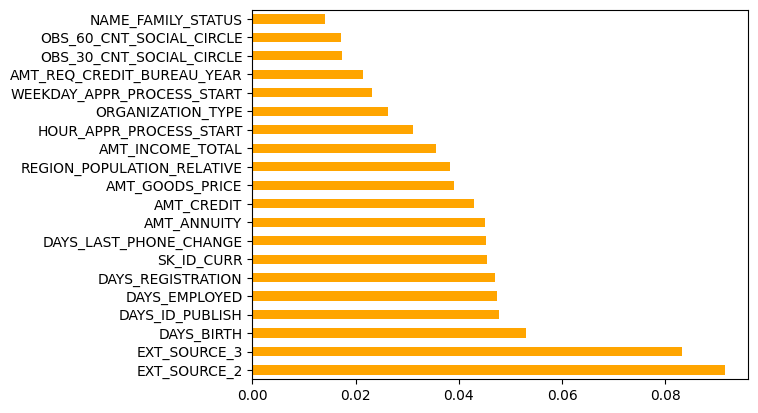

In [ ]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color='orange')
plt.savefig('Fig_1.jpg')
plt.show()

In [ ]:
#Pick top 20 the high importance
features_20 = ['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION',
               'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY', 'SK_ID_CURR', 'AMT_CREDIT',
               'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
               'WEEKDAY_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'NAME_FAMILY_STATUS']

In [ ]:
X = scaled_data[features_20].copy()
y = scaled_data['TARGET'].copy()

In [ ]:
#Fix y to be discrete type
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_transformed = label.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed,train_size=0.8,random_state=42)
print("Input Training Shape:",X_train.shape)
print("Input Test Shape:",X_test.shape)
print("Output Training Shape:",y_train.shape)
print("Output Test Shape:",y_test.shape)

Input Training Shape: (33961, 20)
Input Test Shape: (8491, 20)
Output Training Shape: (33961,)
Output Test Shape: (8491,)


# Modeling

**K-Nearest Neighbor (KNN)**

In [ ]:
#Apply Gridsearch to find the best parameter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}  # Testing k from 1 to 20

#Initialize and configure GridSearchCV
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)  # 5-fold cross-validation

#Perform the grid search
grid_search.fit(X_train, y_train)

#Get the best k value and model
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

#Evaluate the model
accuracy = best_model.score(X_test, y_test)
print(f'Best k: {best_k}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Best k: 20
Accuracy: 61.50%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Train the model
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

#Predict the test data
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall * 100:.2f}%')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1 * 100:.2f}%')

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 61.50%
Precision: 61.06%
Recall: 52.58%
F1: 56.50%
              precision    recall  f1-score   support

           0       0.62      0.70      0.65      4453
           1       0.61      0.53      0.57      4038

    accuracy                           0.62      8491
   macro avg       0.61      0.61      0.61      8491
weighted avg       0.61      0.62      0.61      8491



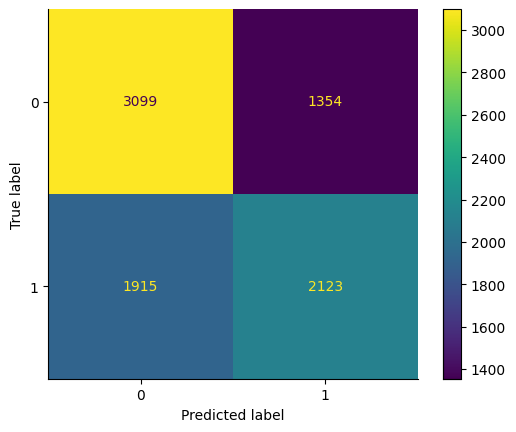

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
sns.despine()
plt.savefig('Fig_2.jpg')

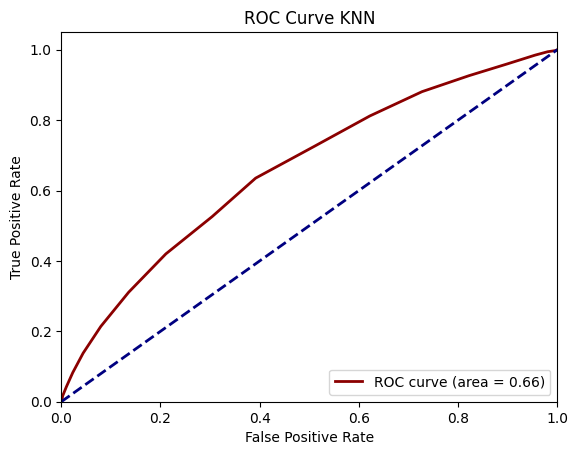

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# Get prediction probabilities
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.savefig('Fig_3.jpg')
plt.show()

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#Predict the test data
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall * 100:.2f}%')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1 * 100:.2f}%')

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 66.54%
Precision: 66.25%
Recall: 60.43%
F1: 63.20%
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      4453
           1       0.66      0.60      0.63      4038

    accuracy                           0.67      8491
   macro avg       0.67      0.66      0.66      8491
weighted avg       0.67      0.67      0.66      8491



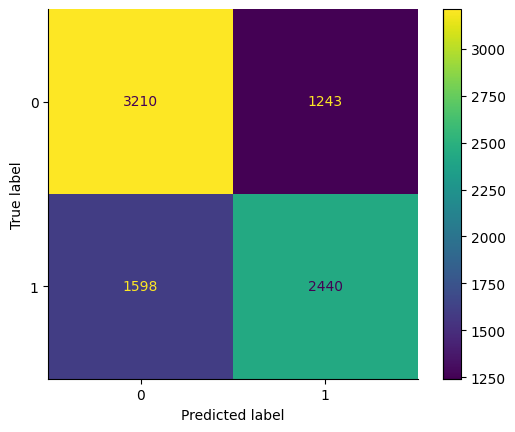

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
sns.despine()
plt.savefig('Fig_6.jpg')

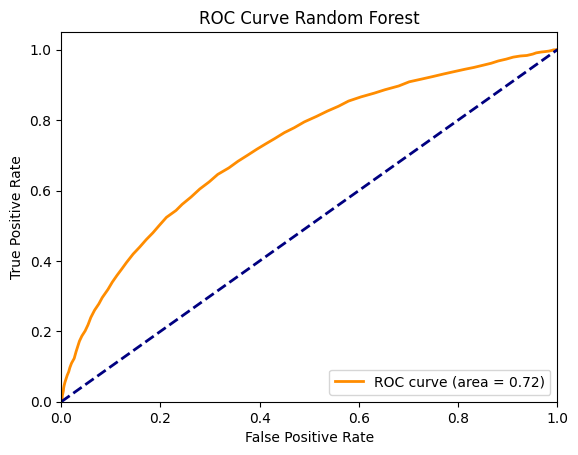

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# Get prediction probabilities
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend(loc="lower right")
plt.savefig('Fig_7.jpg')
plt.show()

**Logistic Regression**

In [ ]:
#Apply Gridsearch to find the best parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],            # Inverse of regularization strength
    'penalty': ['l1', 'l2'],      # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear'],      # Solver for optimization (suitable for small datasets)
}

# Initialize a Logistic Regression model
lr_model = LogisticRegression()

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test data
accuracy = best_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.6553998351195384


In [ ]:
#Train the model
lr = LogisticRegression(C=10, penalty = 'l2', solver = 'liblinear')
lr.fit(X_train, y_train)

#Predict the test data
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall * 100:.2f}%')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1 * 100:.2f}%')

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 65.54%
Precision: 65.14%
Recall: 59.24%
F1: 62.05%
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      4453
           1       0.65      0.59      0.62      4038

    accuracy                           0.66      8491
   macro avg       0.65      0.65      0.65      8491
weighted avg       0.66      0.66      0.65      8491



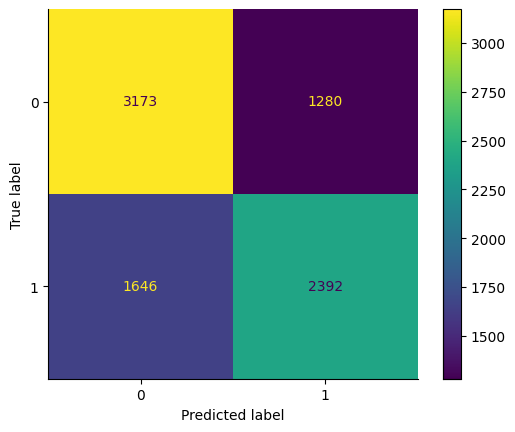

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
sns.despine()
plt.savefig('Fig_8.jpg')

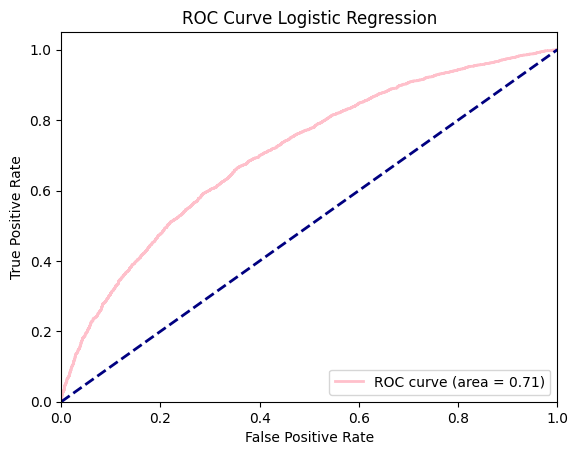

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# Get prediction probabilities
y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Fig_9.jpg')
plt.show()

**Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Train the data
gbc = GradientBoostingClassifier(n_estimators = 1000)
gbc.fit(X_train, y_train)

#Predict the data
y_pred = gbc.predict(X_test)

In [ ]:
#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall * 100:.2f}%')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1 * 100:.2f}%')

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 67.08%
Precision: 66.26%
Recall: 62.73%
F1: 64.44%
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      4453
           1       0.66      0.63      0.64      4038

    accuracy                           0.67      8491
   macro avg       0.67      0.67      0.67      8491
weighted avg       0.67      0.67      0.67      8491



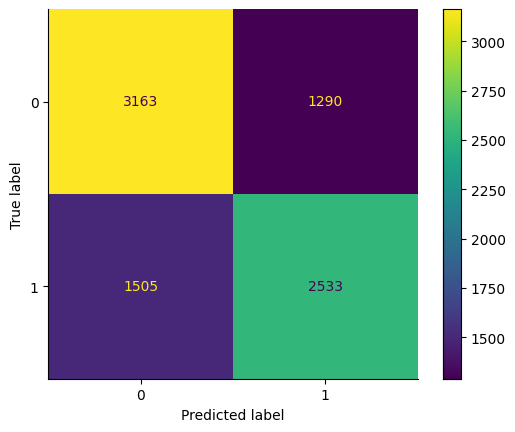

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
sns.despine()
plt.grid(False)
plt.savefig('Fig_10.jpg')

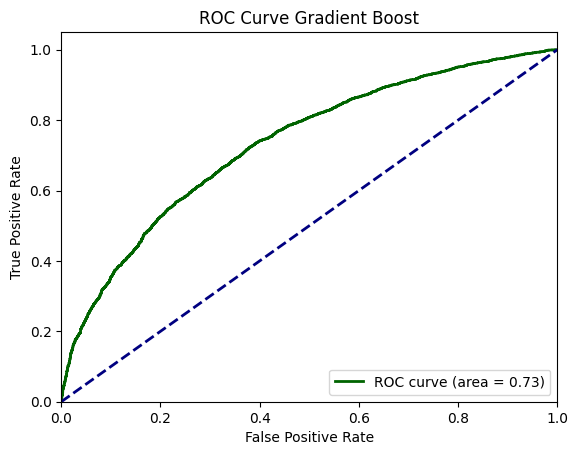

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# Get prediction probabilities
y_pred_prob = gbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gradient Boost')
plt.legend(loc="lower right")
plt.savefig('Fig_11.jpg')
plt.show()


# Result table 1
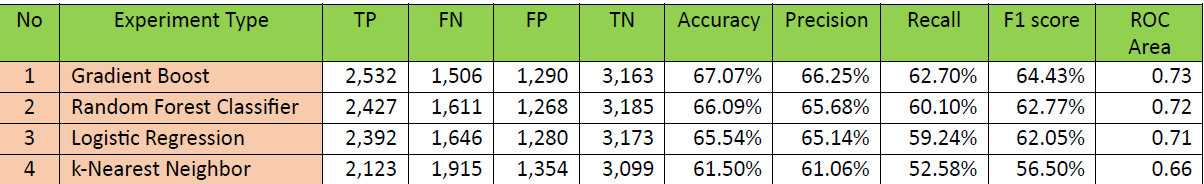

# Test the unknown data

In [ ]:
data_new = pd.read_csv('loan_data_unknown.csv')
data_new.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,280139,Cash loans,M,Y,Y,2,135000.0,592560.0,31023.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-16986,-677,-5323,-528,1,1,0,1,0,0,4,2,2,SATURDAY,8,0,0,0,0,0,0,Security,0.478557,0.506484,7.0,0.0,7.0,0.0,-494,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
1,284067,Cash loans,M,Y,N,1,427500.0,450000.0,22018.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-9648,-605,-3467,-2105,1,1,0,1,0,0,3,2,2,MONDAY,13,0,0,0,1,0,1,Business Entity Type 3,0.594791,0.113196,0.0,0.0,0.0,0.0,-667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,213484,Cash loans,F,N,N,0,225000.0,521280.0,35262.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.032561,-16874,-6995,-10676,-432,1,1,0,1,1,0,2,1,1,MONDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.730700,0.492060,0.0,0.0,0.0,0.0,-1923,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,430855,Cash loans,M,N,Y,0,135000.0,1215000.0,35523.0,1215000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.015221,-15715,-4499,-452,-32,1,1,0,1,1,0,2,2,2,TUESDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.399613,0.304672,0.0,0.0,0.0,0.0,-465,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,342521,Cash loans,M,Y,N,1,202500.0,355536.0,15790.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,Rented apartment,0.020713,-17510,-1263,-92,-928,1,1,0,1,0,0,3,3,2,WEDNESDAY,9,0,0,0,0,0,0,School,0.734874,NaN,4.0,0.0,3.0,0.0,-2218,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0


In [ ]:
#The Target of unknown data.
data_sample = pd.read_csv('sample_submission-2.csv')
data_sample.head()

,SK_ID_CURR,TARGET
0,280139,1
1,284067,1
2,213484,1
3,430855,1
4,342521,1


In [ ]:
data_new.dtypes

SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL               

In [ ]:
#Dealing with missing values
data_new.isnull().sum()

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   6
NAME_TYPE_SUITE                  19
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT        

In [ ]:
data_new['NAME_CONTRACT_TYPE'] = data_new['NAME_CONTRACT_TYPE'].map({'Cash loans':1, 'Revolving loans':0})
data_new['CODE_GENDER'] = data_new['CODE_GENDER'].map({'M':1, 'F':0})
data_new['FLAG_OWN_CAR'] = data_new['FLAG_OWN_CAR'].map({'Y':1, 'N':0})
data_new['FLAG_OWN_REALTY'] = data_new['FLAG_OWN_REALTY'].map({'Y':1, 'N':0})
data_new['WEEKDAY_APPR_PROCESS_START'] = data_new['WEEKDAY_APPR_PROCESS_START'].map({'MONDAY':1,'TUESDAY':2,'WEDNESDAY':3,'THURSDAY':4,'FRIDAY':5, 'SATURDAY': 6, 'SUNDAY':7})

In [ ]:
suite = data_new['NAME_TYPE_SUITE'].value_counts().to_dict()
housing = data_new['NAME_HOUSING_TYPE'].value_counts().to_dict()
org = data_new['ORGANIZATION_TYPE'].value_counts().to_dict()

In [ ]:
data_new['NAME_TYPE_SUITE'] = data_new['NAME_TYPE_SUITE'].map(suite)
data_new['NAME_HOUSING_TYPE'] = data_new['NAME_HOUSING_TYPE'].map(housing)
data_new['ORGANIZATION_TYPE'] = data_new['ORGANIZATION_TYPE'].map(org)

In [ ]:
data_new[categorical_features]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,1,1,1,3840.0,Working,Secondary / secondary special,Married,4081,6,51
1,1,1,1,0,3840.0,Working,Secondary / secondary special,Married,4081,1,1121
2,1,0,0,0,3840.0,Commercial associate,Secondary / secondary special,Civil marriage,4081,1,105
3,1,1,0,1,574.0,Working,Secondary / secondary special,Married,4081,2,1121
4,1,1,1,0,3840.0,Working,Secondary / secondary special,Civil marriage,110,3,115
...,...,...,...,...,...,...,...,...,...,...,...
4711,1,0,1,0,3840.0,State servant,Secondary / secondary special,Married,4081,5,147
4712,0,1,0,1,3840.0,Working,Secondary / secondary special,Married,4081,3,18
4713,1,1,0,1,3840.0,Working,Secondary / secondary special,Single / not married,4081,4,11
4714,1,0,0,1,3840.0,Pensioner,Secondary / secondary special,Married,4081,6,725


In [ ]:
#Ordinal Order
data_new['NAME_FAMILY_STATUS'] = data_new['NAME_FAMILY_STATUS'].map({'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Unknown': 4, 'Widow': 5})
data_new['NAME_INCOME_TYPE'] = data_new['NAME_INCOME_TYPE'].map({'Commercial associate': 0, 'Maternity leave': 1, 'Pensioner': 2, 'State servant': 3, 'Student': 4, 'Unemployed': 5, 'Working': 6})
data_new['NAME_EDUCATION_TYPE'] = data_new['NAME_EDUCATION_TYPE'].map({'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4})

In [ ]:
data_new[categorical_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,1,1,1,3840.0,6,4,1,4081,6,51
1,1,1,1,0,3840.0,6,4,1,4081,1,1121
2,1,0,0,0,3840.0,0,4,0,4081,1,105
3,1,1,0,1,574.0,6,4,1,4081,2,1121
4,1,1,1,0,3840.0,6,4,0,110,3,115


In [ ]:
#fill them with Mode
for column in data_new.columns:
  mode_value = data_new[column].mode()[0]
  data_new[column].fillna(mode_value, inplace = True)
data_new.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

In [ ]:
from sklearn.preprocessing import StandardScaler
data_new_scale=data_new.copy()

feature_scale=[feature for feature in data_new_scale.columns if feature not in categorical_features]


scaler=StandardScaler()
scaler.fit(data_new_scale[feature_scale])

StandardScaler()

In [ ]:
scaled_data_new = pd.concat([data_new_scale[categorical_features].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data_new_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data_new.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,1,1,1,3840.0,6,4,1,4081,6,51,0.012184,2.089929,-0.120488,0.017237,0.300791,-0.207178,0.814716,-0.316075,-0.415388,-0.158289,1.557530,0.0,0.426214,-0.512494,0.035692,-0.604461,-0.239086,1.949708,-0.153802,-0.114698,-1.207738,-0.120954,-0.225912,-0.200924,-0.329551,-0.598577,-0.502914,0.028104,0.167898,2.387552,-0.339907,2.420615,-0.294434,0.501316,0.0,0.594330,0.0,-0.122747,-0.290065,0.0,-0.298151,-0.066879,0.0,-0.061898,0.0,-0.046097,-0.048352,-0.020598,-0.104558,-0.014563,-0.085217,-0.035692,-0.014563,-0.020598,-0.067756,-0.069004,-0.162762,-0.265106,-0.387577,1.284750
1,1,1,1,0,3840.0,6,4,1,4081,1,1121,0.050192,0.744569,0.950137,-0.359755,-0.368222,-0.207178,1.147584,1.382053,-0.414845,0.379509,0.508684,0.0,0.426214,-0.512494,0.035692,-0.604461,-0.239086,0.881288,-0.153802,-0.114698,0.304420,-0.120954,-0.225912,-0.200924,3.034434,-0.598577,1.988412,0.586260,-1.938689,-0.600803,-0.339907,-0.599162,-0.294434,0.286876,0.0,-1.682567,0.0,-0.122747,-0.290065,0.0,3.354005,-0.066879,0.0,-0.061898,0.0,-0.046097,-0.048352,-0.020598,-0.104558,-0.014563,-0.085217,-0.035692,-0.014563,-0.020598,-0.067756,-0.069004,-0.162762,-0.265106,-0.387577,-0.339470
2,1,0,0,0,3840.0,0,4,0,4081,1,105,-0.632785,-0.600791,0.208935,-0.171259,0.615738,-0.207178,0.906604,-0.290156,-0.463066,-1.709385,1.621379,0.0,0.426214,-0.512494,0.035692,1.654366,-0.239086,-0.187132,-2.108871,-2.088846,-0.602875,-0.120954,-0.225912,-0.200924,-0.329551,-0.598577,-0.502914,1.238900,0.090637,-0.600803,-0.339907,-0.599162,-0.294434,-1.269984,0.0,0.594330,0.0,-0.122747,-0.290065,0.0,-0.298151,-0.066879,0.0,-0.061898,0.0,-0.046097,-0.048352,-0.020598,-0.104558,-0.014563,-0.085217,-0.035692,-0.014563,-0.020598,-0.067756,-0.069004,-0.162762,-0.265106,-0.387577,-0.880876
3,1,1,0,1,574.0,6,4,1,4081,2,1121,1.470547,-0.600791,-0.120488,1.663247,0.635130,2.013544,-0.386681,-0.021945,-0.444230,1.253141,1.887415,0.0,0.426214,-0.512494,0.035692,1.654366,-0.239086,-0.187132,-0.153802,-0.114698,0.909283,-0.120954,-0.225912,-0.200924,-0.329551,-0.598577,-0.502914,-0.350992,-0.913078,-0.600803,-0.339907,-0.599162,-0.294434,0.537263,0.0,0.594330,0.0,-0.122747,-0.290065,0.0,-0.298151,-0.066879,0.0,-0.061898,0.0,-0.046097,-0.048352,-0.020598,-0.104558,-0.014563,-0.085217,-0.035692,-0.014563,-0.020598,-0.067756,-0.069004,-0.162762,-0.265106,-0.387577,-0.880876
4,1,1,1,0,3840.0,6,4,0,110,3,115,0.615807,0.744569,0.126579,-0.609560,-0.830947,-0.729701,0.022934,-0.437337,-0.419810,1.357455,1.291494,0.0,0.426214,-0.512494,0.035692,-0.604461,-0.239086,0.881288,1.801267,-0.114698,-0.905307,-0.120954,-0.225912,-0.200924,-0.329551,-0.598577,-0.502914,1.258947,0.196863,1.106828,-0.339907,0.695028,-0.29

**Logistic Regression**

In [ ]:
#Predict the test data
data_test = scaled_data_new[features_20] #Use the same columns as they were trained
true_labels = data_sample['TARGET']
predictions = lr.predict(data_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
#Evaluate
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(true_labels, predictions)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(true_labels, predictions)
print(f'Recall: {recall * 100:.2f}%')

f1 = f1_score(true_labels, predictions)
print(f'F1: {f1 * 100:.2f}%')

report = classification_report(true_labels, predictions)
print(report)

Accuracy: 39.95%
Precision: 100.00%
Recall: 39.95%
F1: 57.09%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57      4716

    accuracy                           0.40      4716
   macro avg       0.50      0.20      0.29      4716
weighted avg       1.00      0.40      0.57      4716



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


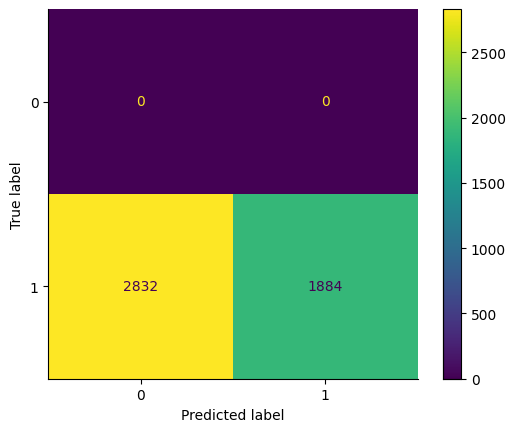

In [ ]:
cm = confusion_matrix(true_labels, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
sns.despine()
plt.savefig('Fig_10.jpg')

**Random Forest**

In [ ]:
data_test = scaled_data_new[features_20] #Use the same columns as they were trained
true_labels = data_sample['TARGET']
predictions = rf.predict(data_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
#Evaluate
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(true_labels, predictions)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(true_labels, predictions)
print(f'Recall: {recall * 100:.2f}%')

f1 = f1_score(true_labels, predictions)
print(f'F1: {f1 * 100:.2f}%')

report = classification_report(true_labels, predictions)
print(report)

Accuracy: 45.63%
Precision: 100.00%
Recall: 45.63%
F1: 62.67%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.46      0.63      4716

    accuracy                           0.46      4716
   macro avg       0.50      0.23      0.31      4716
weighted avg       1.00      0.46      0.63      4716



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


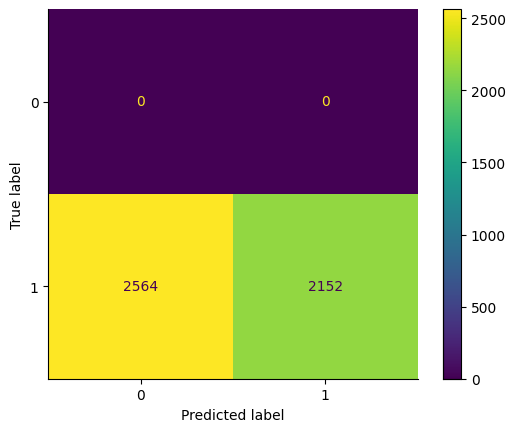

In [ ]:
cm = confusion_matrix(true_labels, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
sns.despine()
plt.savefig('Fig_11.jpg')

**K-Nearest Neighbor**

In [ ]:
data_test = scaled_data_new[features_20] #Use the same columns as they were trained
true_labels = data_sample['TARGET']
predictions = knn.predict(data_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
#Evaluate
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(true_labels, predictions)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(true_labels, predictions)
print(f'Recall: {recall * 100:.2f}%')

f1 = f1_score(true_labels, predictions)
print(f'F1: {f1 * 100:.2f}%')

report = classification_report(true_labels, predictions)
print(report)

Accuracy: 42.92%
Precision: 100.00%
Recall: 42.92%
F1: 60.06%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.43      0.60      4716

    accuracy                           0.43      4716
   macro avg       0.50      0.21      0.30      4716
weighted avg       1.00      0.43      0.60      4716



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


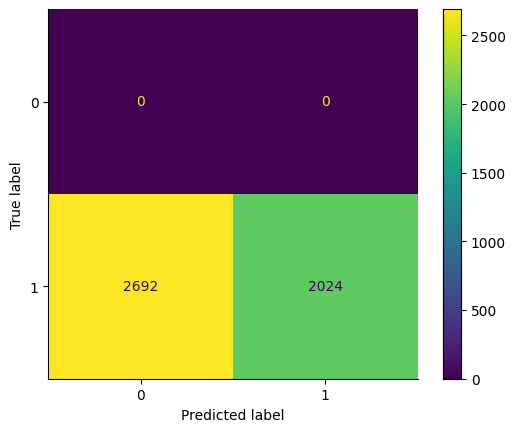

In [ ]:
cm = confusion_matrix(true_labels, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
sns.despine()
plt.savefig('Fig_12.jpg')

 **Gradient Boost**

In [ ]:
data_test = scaled_data_new[features_20] #Use the same columns as they were trained
true_labels = data_sample['TARGET']
predictions = gbc.predict(data_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
#Evaluate
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(true_labels, predictions)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(true_labels, predictions)
print(f'Recall: {recall * 100:.2f}%')

f1 = f1_score(true_labels, predictions)
print(f'F1: {f1 * 100:.2f}%')

report = classification_report(true_labels, predictions)
print(report)

Accuracy: 60.73%
Precision: 100.00%
Recall: 60.73%
F1: 75.57%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.61      0.76      4716

    accuracy                           0.61      4716
   macro avg       0.50      0.30      0.38      4716
weighted avg       1.00      0.61      0.76      4716



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


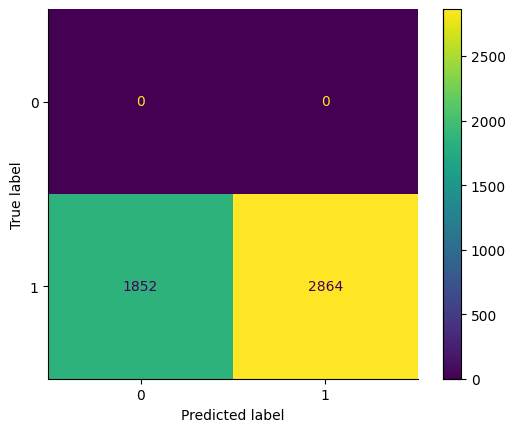

In [ ]:
cm = confusion_matrix(true_labels, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
sns.despine()
plt.savefig('Fig_13.jpg')

# Result table 2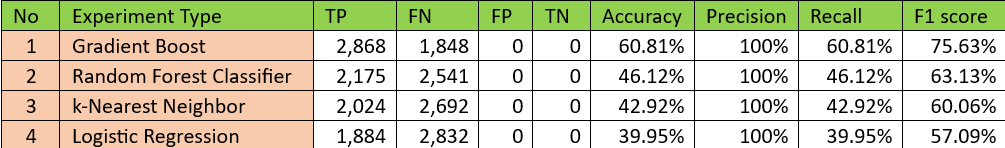